In [1]:
import os
import sys
import numpy as np

In [2]:
from graph import load_graphs, SparseGraph

In [3]:
data_dir = 'kaggle2'
n_samples = 200

In [4]:
file_names = [os.path.join(data_dir, 'event%06i.npz'%i) for i in range(n_samples)]

In [5]:
graphs = load_graphs(file_names, SparseGraph)

In [9]:
batch_size = 1
test_frac = 0.2
validation_frac = 0.2

In [10]:
n_test = int(n_samples*test_frac) // batch_size * batch_size
n_valid = int(n_samples*validation_frac) // batch_size * batch_size
n_train = (n_samples - n_valid - n_test) // batch_size * batch_size

In [11]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [12]:
train_graphs, test_graphs = train_test_split(graphs, test_size=n_test)
train_graphs, valid_graphs = train_test_split(train_graphs, test_size=n_valid)

In [13]:
from trainSegmentClassifier import batch_generator

In [14]:
valid_batcher = batch_generator(valid_graphs, n_samples=n_valid,
                                batch_size=batch_size, train=False)

In [15]:
type(valid_batcher)

generator

In [17]:
from graph import feature_scale
n_features = feature_scale.shape[0]
from model import SegmentClassifier
model = SegmentClassifier(input_dim=n_features, hidden_dim=8, n_iters=1)

import torch
import torch.nn as nn
from estimator import Estimator
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
loss_func = nn.BCELoss()
estim = Estimator(model, loss_func=loss_func, device=device)

2018-08-03 17:55:05.871414 Model: 
SegmentClassifier(
  (input_network): Sequential(
    (0): Linear(in_features=3, out_features=8, bias=True)
    (1): Tanh()
  )
  (edge_network): EdgeNetwork(
    (network): Sequential(
      (0): Linear(in_features=22, out_features=8, bias=True)
      (1): Tanh()
      (2): Linear(in_features=8, out_features=1, bias=True)
      (3): Sigmoid()
    )
  )
  (node_network): NodeNetwork(
    (network): Sequential(
      (0): Linear(in_features=33, out_features=8, bias=True)
      (1): Tanh()
      (2): Linear(in_features=8, out_features=8, bias=True)
      (3): Tanh()
    )
  )
)
2018-08-03 17:55:05.883335 Parameters: 569


In [14]:
from trainSegmentClassifier import set_cuda
set_cuda(False)

In [18]:
validation_outputs = estim.predict(valid_batcher, n_valid, concat=False)

In [7]:
from graph import graph_from_sparse
graphs_full = [graph_from_sparse(g) for g in graphs]

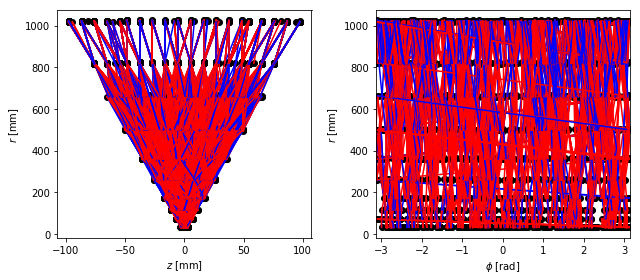

In [8]:
from checks import draw_sample
from graph import feature_scale
i = 1
G = graphs_full[i]
X = G.X * feature_scale
Ri, Ro = G.Ri, G.Ro
y = G.y
draw_sample(X, Ri, Ro, y)

In [37]:
from trainSegmentClassifier import batch_generator
batcher = batch_generator(graphs_full)

In [40]:
test_outputs = estim.predict(batcher, 1, concat=False)

StopIteration: 